In [1]:
import torch

In [57]:
import pandas as pd
from docx import Document
from docx.shared import Inches
from fastai.vision.all import *
from io import BytesIO

def read_image(url_or_path, get_image=True):
    try:
        img = BytesIO(requests.get(url_or_path).content)
        if get_image:
            img = Image.open(img)
    except:
        img = None
    return img

document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph("Second Paragraph. this is where we can add a lot of the details in the body")

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

document.add_heading("Image section", level = 2)

document.add_paragraph("Picture reduced in width").all_caps = True
document.add_picture(read_image('https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885__480.jpg', get_image=False), width=Inches(1.25))

document.add_paragraph("Picture full size").all_caps = True
document.add_picture(read_image('https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885__480.jpg', get_image=False))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

# Save the Word document
document.save('../output/output.docx')


In [55]:
document.add_section??

Signature: document.add_section(start_type=2)
Source:   
    def add_section(self, start_type=WD_SECTION.NEW_PAGE):
        """
        Return a |Section| object representing a new section added at the end
        of the document. The optional *start_type* argument must be a member
        of the :ref:`WdSectionStart` enumeration, and defaults to
        ``WD_SECTION.NEW_PAGE`` if not provided.
        """
        new_sectPr = self._element.body.add_section_break()
        new_sectPr.start_type = start_type
        return Section(new_sectPr, self._part)
File:      /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/docx/document.py
Type:      method


In [52]:
document.add_paragraph??

Signature: document.add_paragraph(text='', style=None)
Source:   
    def add_paragraph(self, text='', style=None):
        """
        Return a paragraph newly added to the end of the document, populated
        with *text* and having paragraph style *style*. *text* can contain
        tab (``\\t``) characters, which are converted to the appropriate XML
        form for a tab. *text* can also include newline (``\\n``) or carriage
        return (``\\r``) characters, each of which is converted to a line
        break.
        """
        return self._body.add_paragraph(text, style)
File:      /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/docx/document.py
Type:      method


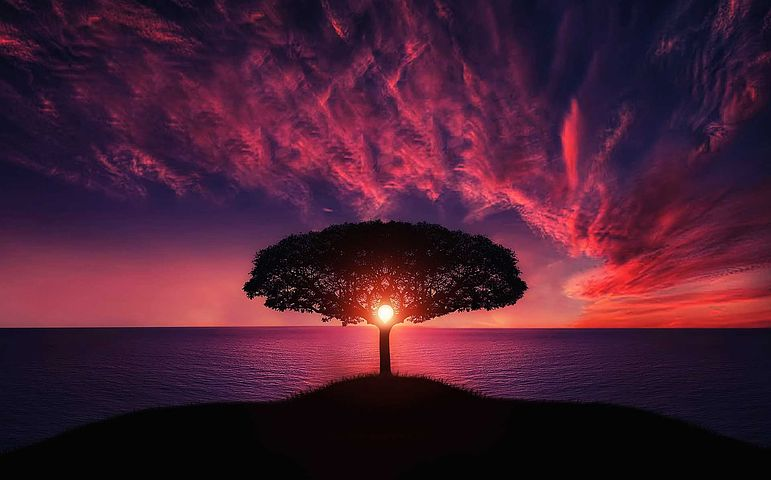

In [42]:
read_image('https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885__480.jpg')